In [45]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Batch size during training
batch_size = 64

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 128

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 200

# Size of feature maps in generator
ngf = 128

# Size of feature maps in discriminator
ndf = 32

# Number of training epochs
num_epochs = 200

# Learning rate for optimizers
lr = 0.0001

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [47]:
# Number of gpus available
ngpu = 1
device = torch.device('cuda:0' if (
    torch.cuda.is_available() and ngpu > 0) else 'cpu')

In [48]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [49]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # input is Z, going into a convolution
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [50]:
# Create the generator
netG = Generator(ngpu).to(device)
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(200, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Batch

In [51]:
# Load the Generator
netG = Generator(ngpu).to(device)

# Apply the weights_init function to randomly initialize all weights
netG.load_state_dict(torch.load('./netGweightsBTattoo128v03'))

<All keys matched successfully>

In [52]:
#real_cpu = data[0].to(device)
b_size = 128
noise = torch.randn(b_size, nz, 1, 1, device=device)
fake = netG(noise)

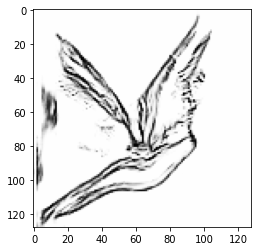

In [105]:
plt.imshow(np.transpose(vutils.make_grid(fake[8].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

In [69]:
vutils.make_grid(fake[6].to(device)[:64], padding=5, normalize=True).cpu()

tensor([[[0.9974, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9840, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9913, 0.9995, 0.9998,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.2378, 0.2781, 0.0237,  ..., 0.9999, 0.9998, 1.0000],
         [0.2998, 0.4774, 0.0453,  ..., 0.9991, 0.9995, 0.9999],
         [0.5142, 0.4942, 0.1323,  ..., 0.9914, 0.9986, 0.9964]],

        [[0.9974, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9840, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9913, 0.9995, 0.9998,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.2378, 0.2781, 0.0237,  ..., 0.9999, 0.9998, 1.0000],
         [0.2998, 0.4774, 0.0453,  ..., 0.9991, 0.9995, 0.9999],
         [0.5142, 0.4942, 0.1323,  ..., 0.9914, 0.9986, 0.9964]],

        [[0.9974, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9840, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9913, 0.9995, 0.9998,  ..., 1.0000, 1.0000, 1.

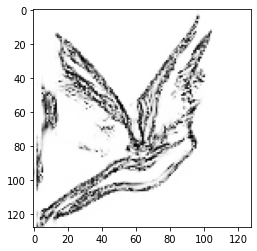

In [114]:
import torchvision.transforms as transforms

tran1 = transforms.ToPILImage()
transform_rgb = transforms.Lambda(lambda image: image.convert('RGB'))
pil_image_single = transform_rgb(tran1(fake[8]))
plt.imshow(pil_image_single)

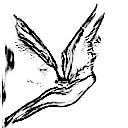

In [120]:
from torchvision.utils import save_image
save_image(fake[8], 'img1.png')
im = Image.open('./img1.png')
im.show()